<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set  (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Year:** Year the observations were recorded

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Alcohol:** Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

**Hepatitis B:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country


##  Table of Content

1. **[Data Preparation](#eda)**
2. **[Linear Regression](#lf)**
3. **[Gradient Descent](#gd)**
4. **[Regularization](#reg)**
5. **[Grid Search](#gs)**

**Import the required libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm

from scipy import stats

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import SGDRegressor

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV



#### Load the Life expectancy dataset and display the first five records 

In [2]:
# load the csv file
df=pd.read_csv('Life_Expectancy.csv')
# type your code here

# display the first five observations
df.head()
# type your code here

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Albania,2015,Developing,74.0,0,4.60,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
2,Algeria,2015,Developing,19.0,21,NaN,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6
3,Angola,2015,Developing,335.0,66,NaN,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
4,Antigua,2015,Developing,13.0,0,NaN,99.0,0,47.7,0,86,99,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,76.4


#### Check the shape of the data and display its information

In [3]:
# check the size of the dataframe
# type your code here
df.shape

(182, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 20 columns):
Country              182 non-null object
Year                 182 non-null int64
Status               182 non-null object
Adult_Mortality      173 non-null float64
Infant_Deaths        182 non-null int64
Alcohol              15 non-null float64
Hepatitis B          173 non-null float64
Measles              182 non-null int64
BMI                  178 non-null float64
Underfive_Deaths     182 non-null int64
Polio                182 non-null int64
Diphtheria           182 non-null int64
HIV                  182 non-null float64
GDP                  157 non-null float64
Population           141 non-null float64
Malnourished10_19    178 non-null float64
Malnourished5_9      178 non-null float64
Income_Index         169 non-null float64
Schooling            173 non-null float64
Life_Expectancy      173 non-null float64
dtypes: float64(12), int64(6), object(2)
memory usage: 28.6+ KB


In [5]:
# display dataset information understand the dataset
# type your code here
df.columns

Index(['Country', 'Year', 'Status', 'Adult_Mortality', 'Infant_Deaths',
       'Alcohol', 'Hepatitis B', 'Measles ', 'BMI', 'Underfive_Deaths ',
       'Polio', 'Diphtheria ', 'HIV', 'GDP', 'Population', 'Malnourished10_19',
       'Malnourished5_9', 'Income_Index', 'Schooling', 'Life_Expectancy'],
      dtype='object')

In [6]:
df.describe()

,Year,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
count,182.000000,173.000000,182.000000,15.000000,173.000000,182.000000,178.000000,182.000000,182.000000,182.000000,182.00000,157.000000,1.410000e+02,178.000000,178.000000,169.000000,173.000000,173.000000
mean,2014.890110,149.971098,21.741758,2.719333,81.710983,1482.104396,44.411236,28.851648,82.961538,84.357143,0.62033,7098.949079,1.133250e+07,4.368539,4.412360,0.696586,12.845665,72.007514
std,0.457003,95.679846,82.297159,3.887194,25.391991,7859.929395,21.305610,105.904392,24.973658,22.958019,1.33283,11603.099478,2.912065e+07,4.137007,4.223363,0.152706,3.215180,8.032405
min,2013.000000,1.000000,0.000000,0.010000,6.000000,0.000000,2.500000,0.000000,5.000000,6.000000,0.10000,33.681223,2.920000e+02,0.100000,0.100000,0.347000,0.000000,51.000000
25%,2015.000000,74.000000,0.000000,0.010000,78.000000,0.000000,24.425000,0.000000,83.250000,84.000000,0.10000,762.261218,2.635310e+05,1.500000,1.400000,0.575000,10.800000,66.200000
50%,2015.000000,137.000000,2.000000,0.010000,93.000000,9.000000,52.650000,2.000000,93.000000,94.000000,0.10000,3111.762887,1.977527e+06,3.150000,3.250000,0.733000,13.100000,74.100000
75%,2015.000000,199.000000,15.000000,5.285000,97.000000,197.250000,62.100000,19.500000,97.750000,97.000000,0.30000,6993.477360,1.127366e+07,6.400000,6.200000,0.799000,15.000000,77.100000
max,2015.000000,484.000000,910.000000,10.660000,99.000000,90387.000000,87.300000,1100.000000,99.000000,99.000000,9.30000,66346.522670,2.581621e+08,26.700000,27.300000,0.948000,20.400000,88.000000


### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Data Preparation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. The dataset gives the life expectancy for different countries. Check if any information about life expectancy is missing from the given records. How do we fix the problem if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# type your code here
df['Life_Expectancy'].isnull().sum()#Dependent Variable(Target)

9

ON CHECKING IT WAS FOUND THAT 9 COLUMNS DATA WERE MISSING

In [8]:
null=df['Life_Expectancy'].isnull()
null_treat=null.index[null == True].tolist()
null_treat

[46, 100, 104, 111, 118, 122, 135, 138, 168]

YES we can fix the problem by,SINCE ONLY FEW COLUMNS DATA WERE MISSING WE CAN DROP THEM Or we  Can do Mean Imputation

In [9]:
df=df.drop(df.index[null_treat])
df['Life_Expectancy'].isnull().sum()

0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How do we handle the missing values from the entire dataset?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
# type your code here
df.shape

(173, 20)

In [11]:
Total=df.isnull().sum().sort_values(ascending=False)
percentage=((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)
missing_data=pd.concat([Total,percentage],axis=1,keys=['Total','Percentage'])
missing_data

,Total,Percentage
Alcohol,166,95.953757
Population,34,19.653179
GDP,21,12.138728
Hepatitis B,9,5.202312
Income_Index,7,4.046243
Schooling,7,4.046243
Malnourished5_9,2,1.156069
Malnourished10_19,2,1.156069
BMI,2,1.156069
Life_Expectancy,0,0.000000


The variables 'Alcohol' has missing values for 166 records out of 173 entries,i.e More than 95% of the data is missing,hence we can drop this variable from the dataframe

In [12]:
df= df.drop('Alcohol',axis=1)
df

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,Afghanistan,2015,Developing,263.0,62,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Albania,2015,Developing,74.0,0,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
2,Algeria,2015,Developing,19.0,21,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6
3,Angola,2015,Developing,335.0,66,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
4,Antigua,2015,Developing,13.0,0,99.0,0,47.7,0,86,99,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,76.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,Venezuela,2015,Developing,157.0,9,87.0,0,62.1,10,87,87,0.1,NaN,NaN,1.6,1.5,0.769,14.3,74.1
178,Viet Nam,2015,Developing,127.0,28,97.0,256,17.5,35,97,97,0.1,NaN,NaN,14.2,14.5,0.678,12.6,76.0
179,Yemen,2015,Developing,224.0,37,69.0,468,41.3,47,63,69,0.1,NaN,NaN,13.6,13.4,0.499,9.0,65.7
180,Zambia,2015,Developing,33.0,27,9.0,9,23.4,40,9,9,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5,61.8


In [13]:
df.columns


Index(['Country', 'Year', 'Status', 'Adult_Mortality', 'Infant_Deaths',
       'Hepatitis B', 'Measles ', 'BMI', 'Underfive_Deaths ', 'Polio',
       'Diphtheria ', 'HIV', 'GDP', 'Population', 'Malnourished10_19',
       'Malnourished5_9', 'Income_Index', 'Schooling', 'Life_Expectancy'],
      dtype='object')

In [14]:
df.isnull().sum()

Country               0
Year                  0
Status                0
Adult_Mortality       0
Infant_Deaths         0
Hepatitis B           9
Measles               0
BMI                   2
Underfive_Deaths      0
Polio                 0
Diphtheria            0
HIV                   0
GDP                  21
Population           34
Malnourished10_19     2
Malnourished5_9       2
Income_Index          7
Schooling             7
Life_Expectancy       0
dtype: int64

Depending on the distribution of each variable,Imputation of missing values can be done with Mean Imputation and Median Imputation.For skewed variables we use Median for imputation and for remaining variables we impute with Mean

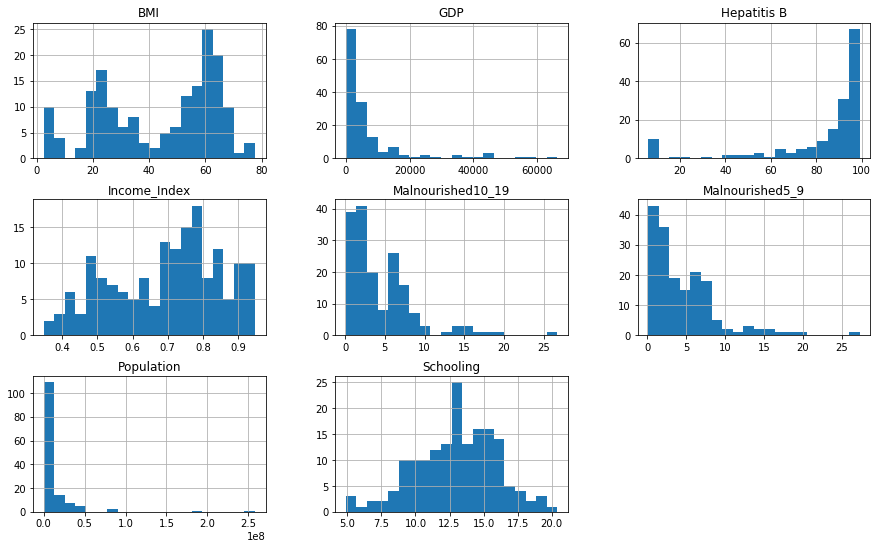

In [15]:
df_missing_values=df[['Hepatitis B', 'BMI','GDP', 'Population','Malnourished10_19',
 'Malnourished5_9', 'Income_Index', 'Schooling']]
df_missing_values.hist(bins = 20,figsize =(15,9))
plt.show()

Median Imputation-For More Skewed Columns 

In [16]:
df['GDP']=df['GDP'].fillna(df['GDP'].median())
df['Hepatitis B'] = df['Hepatitis B'].fillna(df['Hepatitis B'].median())
df['Malnourished5_9'] = df['Malnourished5_9'].fillna(df['Malnourished5_9'].median())
df['Malnourished10_19'] = df['Malnourished10_19'].fillna(df['Malnourished10_19'].median())
df['Population'] = df['Population'].fillna(df['Population'].median())

Mean Imputation-For Slighly Skewed Columns

In [17]:
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df['Income_Index'] = df['Income_Index'].fillna(df['Income_Index'].mean())
df['Schooling'] = df['Schooling'].fillna(df['Schooling'].mean())

In [18]:
df.isnull().sum()

Country              0
Year                 0
Status               0
Adult_Mortality      0
Infant_Deaths        0
Hepatitis B          0
Measles              0
BMI                  0
Underfive_Deaths     0
Polio                0
Diphtheria           0
HIV                  0
GDP                  0
Population           0
Malnourished10_19    0
Malnourished5_9      0
Income_Index         0
Schooling            0
Life_Expectancy      0
dtype: int64

Now-NO MISSING VALUES IN THE DATA SET

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there any redundant features in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
df.shape

(173, 19)

In [20]:
# type your code here
df.describe(include = ['object'])#redundant features=>Multicollinearity

,Country,Status
count,173,173
unique,173,2
top,Iraq,Developing
freq,1,141


Since the variable 'Country' has all unique values as same 173 we can drop this variable from the dataframe.

In [21]:
df=df.drop('Country',axis = 1)
df

,Year,Status,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,2015,Developing,263.0,62,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,2015,Developing,74.0,0,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
2,2015,Developing,19.0,21,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6
3,2015,Developing,335.0,66,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
4,2015,Developing,13.0,0,99.0,0,47.7,0,86,99,0.2,13566.954100,2174645.0,3.3,3.3,0.784,13.9,76.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2015,Developing,157.0,9,87.0,0,62.1,10,87,87,0.1,3124.343999,2174645.0,1.6,1.5,0.769,14.3,74.1
178,2015,Developing,127.0,28,97.0,256,17.5,35,97,97,0.1,3124.343999,2174645.0,14.2,14.5,0.678,12.6,76.0
179,2015,Developing,224.0,37,69.0,468,41.3,47,63,69,0.1,3124.343999,2174645.0,13.6,13.4,0.499,9.0,65.7
180,2015,Developing,33.0,27,9.0,9,23.4,40,9,9,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5,61.8


In [22]:
df.describe(include =['int64','float64'])

,Year,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,1.730000e+02,173.000000,173.000000,173.000000,173.000000,173.000000
mean,2014.988439,149.971098,22.872832,82.716763,1559.208092,43.466667,30.352601,83.040462,84.508671,0.647399,6764.134560,9.663690e+06,4.492486,4.539306,0.695627,12.995783,72.007514
std,0.152057,95.679846,84.268577,24.066903,8055.443243,20.378109,108.428722,24.833951,22.687364,1.361795,11095.340318,2.650522e+07,4.131178,4.217814,0.150721,2.879849,8.032405
min,2013.000000,1.000000,0.000000,6.000000,0.000000,2.500000,0.000000,5.000000,6.000000,0.100000,33.681223,2.966000e+03,0.100000,0.100000,0.347000,4.900000,51.000000
25%,2015.000000,74.000000,0.000000,81.000000,0.000000,24.400000,0.000000,84.000000,84.000000,0.100000,918.677154,5.874820e+05,1.500000,1.500000,0.576000,11.100000,66.200000
50%,2015.000000,137.000000,2.000000,93.000000,16.000000,51.000000,3.000000,93.000000,94.000000,0.100000,3124.343999,2.174645e+06,3.300000,3.300000,0.723000,13.100000,74.100000
75%,2015.000000,199.000000,17.000000,97.000000,212.000000,61.600000,21.000000,97.000000,97.000000,0.300000,6461.192554,7.177991e+06,6.400000,6.400000,0.798000,15.000000,77.100000
max,2015.000000,484.000000,910.000000,99.000000,90387.000000,77.600000,1100.000000,99.000000,99.000000,9.300000,66346.522670,2.581621e+08,26.700000,27.300000,0.948000,20.400000,88.000000


SINCE 'Year' COLUMN has nearly zero std and the values at 25th,50th and 75th percentile are all 2015.We can see The unique values taken by variable 'Year'.

In [23]:
df['Year'].unique()

array([2015, 2013], dtype=int64)

In [24]:
df['Year'].nunique()

2

In [25]:
df['Year'].value_counts()

2015    172
2013      1
Name: Year, dtype: int64

SINCE 'Year' COLUMN is Multi-Collinearity we can Drop it.

In [26]:
df=df.drop('Year',axis =1)

underfive_Death-The variable underfive_Death gives number of deaths for age group 0-5 which includes the age group 0-1,hence we can eliminate the variable infant_Deaths as it provides no new information


In [27]:
df= df.drop('Infant_Deaths',axis =1)

In [28]:
df.shape

(173, 16)

AFTER EDA WE GOT 173X16 

In [29]:
df.columns

Index(['Status', 'Adult_Mortality', 'Hepatitis B', 'Measles ', 'BMI',
       'Underfive_Deaths ', 'Polio', 'Diphtheria ', 'HIV', 'GDP', 'Population',
       'Malnourished10_19', 'Malnourished5_9', 'Income_Index', 'Schooling',
       'Life_Expectancy'],
      dtype='object')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Perform dummy encoding for appropriate variables of the dataset if required</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
# type your code here
df.describe(include='object')

,Status
count,173
unique,2
top,Developing
freq,141


In [31]:
df['Status']=pd.get_dummies(data = df['Status'],drop_first=True)
df.head()

,Status,Adult_Mortality,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,1,263.0,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,1,74.0,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
2,1,19.0,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6
3,1,335.0,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
4,1,13.0,99.0,0,47.7,0,86,99,0.2,13566.954100,2174645.0,3.3,3.3,0.784,13.9,76.4


Dummy encoding FOR STATUS COLUMN-DEVOLOPING=1,DEVELOPED=0

<a id="lf"> </a>
## 2. Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5.  Build a full model on the given data. Check whether the obtained residuals have constant variance
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
# type your code here
x=df.iloc[:,:15]#Independend Variable
X=sm.add_constant(x)
y=df['Life_Expectancy']#Dependend variable(Target Variable)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.2)
OLS_MLR_model = sm.OLS(y_train, X_train).fit()
OLS_MLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     54.83
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           7.90e-47
Time:                        20:28:00   Log-Likelihood:                -339.72
No. Observations:                 138   AIC:                             711.4
Df Residuals:                     122   BIC:                             758.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                52.7834      2.852     18.508      0.000      47.138      58.429
Status               -1.1090      0.852     -1.302      0.195      -2.795       0.577
Adult_Mortality      -0.0236      0.004     -5.383      0.000      -0.032      -0.015
Hepatitis B           0.0577      0.034      1.707      0.090      -0.009       0.125
Measles            2.848e-05   5.47e-05      0.520      0.604   -7.99e-05       0.000
BMI                  -0.0140      0.017     -0.846      0.399      -0.047       0.019
Underfive_Deaths     -0.0024      0.005     -0.505      0.614      -0.012       0.007
Polio                 0.0121      0.016      0.779      0.438      -0.019       0.043
Diphtheria           -0.0119      0.036     -0.325      0.745      -0.084       0.060
HIV                  -0.6763      0.262     -2.580      0.011      -1.195      -0.157
GDP               -1.209e-06   2.93e-05     -0.041      0.967   -5.91e-05    5.67e-05
Population        -4.461e-09   1.06e-08     -0.422      0.674   -2.54e-08    1.64e-08
Malnourished10_19    -0.1450      0.257     -0.565      0.573      -0.653       0.363
Malnourished5_9       0.0360      0.253      0.143      0.887      -0.464       0.536
Income_Index         29.1717      5.180      5.632      0.000      18.918      39.425
Schooling             0.0184      0.234      0.079      0.937      -0.445       0.482
==============================================================================
Omnibus:                        8.293   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               13.932
Skew:                          -0.219   Prob(JB):                     0.000943
Kurtosis:                       4.493   Cond. No.                     6.46e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.46e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

FSTATS=0<0.05,HENCE MODEL IS SIGNIFICANCE WE CAN USE THIS MODEL.R_SQUARE=0.871<1 WHICH MEANS MODEL IS FIT

TSATS(PVAL) OF Measles,BMI,UNDERFIVE_DEATHS,POLIO,DIPTHERIA,GDP,POPOULATION,Malnourished10_19,Malnourished5_9,SCHOOLING ARE>0.05.hence they are Insignificant for The Model,Hence We can Remove them From The Model

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
for i in range(len(X_train.columns)):
    if i!=0:
        vif=variance_inflation_factor(X_train.values,i)
        print(i,X_train.columns[i],vif)
    

1 Status 1.6314580986740237
2 Adult_Mortality 2.3815667265551435
3 Hepatitis B 9.63014884034477
4 Measles  3.348638434253049
5 BMI 1.6402276533922804
6 Underfive_Deaths  4.699681117667082
7 Polio 2.3675817901913883
8 Diphtheria  10.355713748381444
9 HIV 1.743468512028256
10 GDP 1.5607019175017667
11 Population 1.4217413632679075
12 Malnourished10_19 18.694298966715625
13 Malnourished5_9 18.902921472556855
14 Income_Index 8.447420666464888
15 Schooling 6.171416584347039


Text(0, 0.5, 'Residuals')

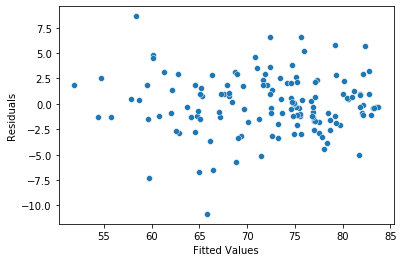

In [35]:
y_predict=OLS_MLR_model.fittedvalues#fittedvalues
residual=OLS_MLR_model.resid

sns.scatterplot(data=df,x=y_predict,y=residual)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')


Variance Between 1 To 10 which Means other than Malnourished10_19:18.69,Malnourished5_9:18.90 all columns Don't Have variance

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Build a model to study the impact of immunization on life expectancy, using least squares regression. Find the unexplained variation for the model
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
x= df[['Hepatitis B','Polio', 'Diphtheria ']]
y=df['Life_Expectancy']
lr=LinearRegression()
OLS_MLR_model=lr.fit(x,y)
y_predict=OLS_MLR_model.predict(x)
residuals=np.array(y-y_predict)
unexplained_variation=np.sum(residuals**2)
print('unexplained variation is:',unexplained_variation)

unexplained variation is: 7272.4649163342965


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a model to study the impact of malnutrition on life expectancy, using least squares regression. Interpret the coeffients</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
# type your code here
x=df[['Malnourished10_19','Malnourished5_9']]
X=sm.add_constant(x)#Interpret the coeffients
y=df['Life_Expectancy']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.2)
OLS_MLR_model=sm.OLS(y_train,sm.add_constant(X_train)).fit()
print(OLS_MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     19.68
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           3.16e-08
Time:                        20:28:00   Log-Likelihood:                -463.28
No. Observations:                 138   AIC:                             932.6
Df Residuals:                     135   BIC:                             941.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                76.2379      0.87

FSTATISTICS=0 AND LESS THAN 0.05,HENCE THE MODEL IS SIGNIFICANT AND WE CAN USE THIS MODEL.R_SQUARE IS 0.226 LESS THAN 1,HENCE MODEL IS FIT

For per unit Change in Malnourished10_19 Life Expectancy is -0.3468(Decreasing by 0.346)

For per unit Change in Malnourished5_9 Life Expectancy is -0.5153(Decreasing by 0.516)

<a id="gd"> </a>
## 3. Gradient Descent

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a model to study the influence of adult mortality rate on life expectancy using both the least squares regression and gradient descent approach. Are the fits for both the models different?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
X = df['Adult_Mortality'].values
X = X.reshape(-1,1)
y = df['Life_Expectancy']
X_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
y = (y - y.mean()) / y.std()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1, test_size=0.2)

LEAST SQUARED:-

In [39]:
MLR_model = lr.fit(X_train,y_train)
lin_pred = MLR_model.predict(X_train)
lin_pred

array([ 0.10874948, -0.89795768, -0.59012161,  0.04219033, -0.06596829,
       -0.30724522,  0.18362852,  0.27514735,  0.46650491,  0.60794311,
        0.66618236, -0.39044416,  0.57466353, -0.49860278, -0.92291736,
        0.72442162,  0.2169081 , -0.27396564,  0.18362852, -2.7699338 ,
        0.73274152, -0.1907667 ,  1.12377653, -0.30724522, -0.53188235,
       -0.49860278, -0.81475874,  1.24857493, -1.77986643, -0.95619694,
        0.44154523, -0.11588766, -0.74819959, -0.11588766, -0.63172108,
        0.64122268, -0.36548447,  0.79930067, -0.6067614 , -0.04932851,
       -0.872998  ,  0.2169081 ,  1.09881685,  0.84922003,  0.79098077,
        0.27514735,  0.58298343, -0.93123726, -0.04932851,  0.79098077,
       -1.10595503,  0.6245829 , -0.00772904,  1.04889748, -0.00772904,
        0.65786247, -0.25732585, -1.18083407, -1.60514866, -0.08260808,
        0.6245829 , -0.80643885,  0.03387043,  0.54970385, -1.70498738,
       -0.08260808,  0.46650491, -0.39044416,  0.68282215, -1.53

Gradient Descent:-

In [40]:
sgd = SGDRegressor(random_state =1)
lin_reg = sgd.fit(X_train,y_train)
sgd_pred = lin_reg.predict(X_train)

In [41]:
sgd_pred

array([ 0.10817848, -0.8723292 , -0.57250454,  0.04335153, -0.06199227,
       -0.29698998,  0.18110881,  0.27024587,  0.45662336,  0.59438064,
        0.65110423, -0.37802367,  0.56196716, -0.48336748, -0.89663931,
        0.70782781,  0.21352228, -0.2645765 ,  0.18110881, -2.69558729,
        0.71593118, -0.18354281,  1.09678954, -0.29698998, -0.51578095,
       -0.48336748, -0.79129551,  1.21834008, -1.73128635, -0.92905279,
        0.43231326, -0.11061249, -0.72646855, -0.11061249, -0.61302138,
        0.62679412, -0.35371357,  0.78075814, -0.58871128, -0.04578553,
       -0.84801909,  0.21352228,  1.07247943,  0.82937835,  0.77265477,
        0.27024587,  0.57007053, -0.90474268, -0.04578553,  0.77265477,
       -1.07491343,  0.61058738, -0.00526869,  1.02385921, -0.00526869,
        0.64300086, -0.24836977, -1.14784376, -1.56111559, -0.07819901,
        0.61058738, -0.78319214,  0.03524816,  0.53765706, -1.65835602,
       -0.07819901,  0.45662336, -0.37802367,  0.66731097, -1.49

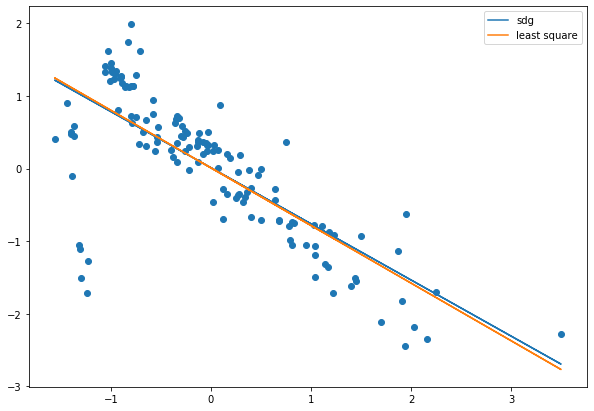

In [42]:
plt.figure(figsize = (10,7))
plt.scatter(X_train, y_train)
plt.plot(X_train, sgd_pred, label = 'sdg')
plt.plot(X_train, lin_pred, label = 'least square')
plt.legend(loc = 'upper right')
plt.show()

Fits for both the models OLS AND SGD are Same and Not different

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Build a model to analyze the influence of immunization on life expectancy. Use SGD and plot a horizontal multiple barchart to compare the values of beta coefficients with values obtained by the full model build least squares regression.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
df.columns

Index(['Status', 'Adult_Mortality', 'Hepatitis B', 'Measles ', 'BMI',
       'Underfive_Deaths ', 'Polio', 'Diphtheria ', 'HIV', 'GDP', 'Population',
       'Malnourished10_19', 'Malnourished5_9', 'Income_Index', 'Schooling',
       'Life_Expectancy'],
      dtype='object')

In [44]:
# type your code here
X = df[['Hepatitis B','Polio','Diphtheria ']]
y = df['Life_Expectancy']
X_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
y = (y-y.mean()) / y.std()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1, test_size=0.2)

In [45]:
sgd = SGDRegressor(random_state =1)
lin_reg_sgd = sgd.fit(X_train,y_train)
MLR_model = lr.fit(X_train,y_train)


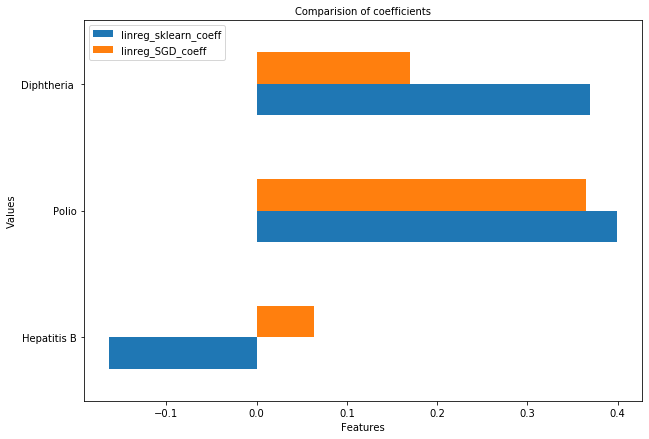

In [46]:
df_immunization = df.iloc[:,[2,6,7]]
df_coeff = pd.DataFrame([MLR_model.coef_,lin_reg_sgd.coef_],columns=df_immunization.columns,
                        index =['linreg_sklearn_coeff','linreg_SGD_coeff'])
fig = df_coeff.T.plot.barh(figsize=(10,7))
plt.title('Comparision of coefficients', fontsize = 10)
fig.set_xlabel('Features', fontsize = 10)
fig.set_ylabel('Values', fontsize = 10)
plt.xticks(rotation ='horizontal')
fig.legend(loc ='upper left')
plt.show()

In [47]:
df_coeff

,Hepatitis B,Polio,Diphtheria
linreg_sklearn_coeff,-0.163128,0.399004,0.369057
linreg_SGD_coeff,0.063410,0.365276,0.169597


Coefficient obtained from the SGD model have similar values as values obtained by the linear
regression model using sklearn, Thus SGD model predicts accuracy of life expectancy than
the linear regression


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a full model using least squares regression. Check whether the model overfits the training data or not.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [48]:
# type your code here
X = df.iloc[:,:15]
y = df['Life_Expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size=0.2)


In [49]:
linreg = LinearRegression()
MLR_model = linreg.fit(X_train, y_train)
train_pred = MLR_model.predict(X_train)
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
# for testing set:
test_pred = MLR_model.predict(X_test)
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)


Root Mean Squared Error (RMSE) on training set:  2.8371
Root Mean Squared Error (RMSE) on test set:  2.6785


In [50]:
r_square = MLR_model.score(X_train, y_train)
adj_r_square = 1-((1-r_square)*(172)/(173-16-1))
print("The R-Squared value is : ", r_square)
print("The Adjusted R-Squared value is : ", adj_r_square)


The R-Squared value is :  0.8708257437987883
The Adjusted R-Squared value is :  0.8575771021371256


As there is no difference between RMSE train and test set we can say that there is no "Overfitting"

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Can we use a linear regression model to analyze how all features from the dataset impact life expectancy?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

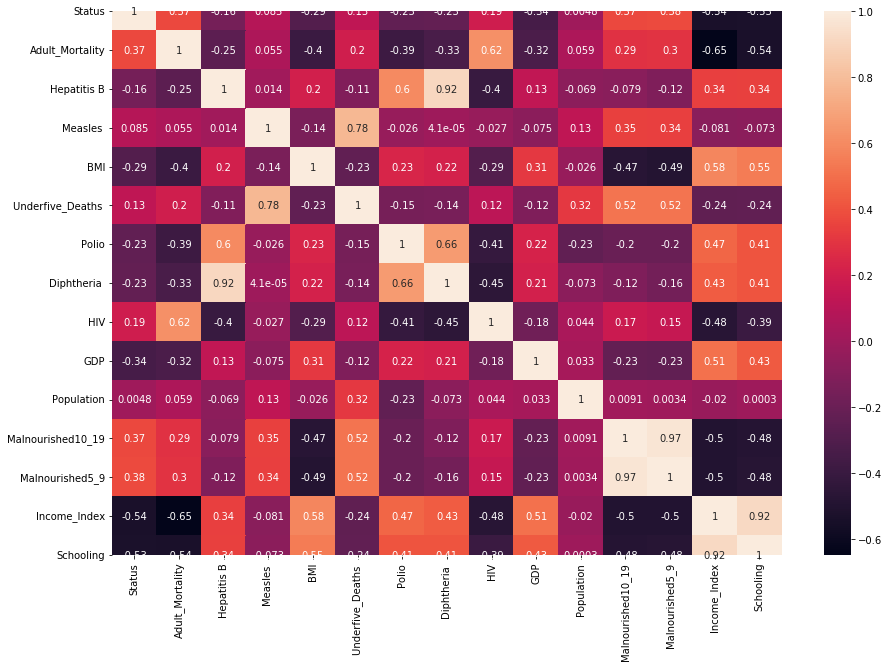

In [51]:
# type your code here
fig, ax = plt.subplots(figsize= (15,10))

df_features = df.iloc[:,:15]
sns.heatmap(df_features.corr(), annot = True, annot_kws = {"size" : 10})
plt.yticks(rotation = 'horizontal', fontsize = 10)
plt.xticks(fontsize = 10)
plt.show()


From the plot we can that predictor variable "Malnourished10_19" and "Malnourished5_9"
have a high positive correlation value(0.97)
The variables "Hepatitis B" and "Diptheria" have high positive correlation value(0.92)
The variables "Index_income" and "Schooling" have high positive correlation value(0.92)
HENCE THIS VARIABLES CREATE MORE VARIANCE IN THE MODEL

So before going to apply regression model we need to alter the data to rectify the problem

<a id="reg"> </a>
## 4. Regularization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Can we perform regression analysis without eliminating features involved in multicollinearity detected in question 11?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [52]:
# type your code here
X = df.iloc[:,:15]
y = df['Life_Expectancy']
X_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
y = (y - y.mean()) / y.std()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1, test_size=0.2)

# Use Ridge() to perform ridge regression
# 'Alpha' assigns the regularization strength to the model
ridge = Ridge(alpha = 5.5)
ridge_model = ridge.fit(X_train, y_train)
train_pred = ridge_model.predict(X_train)
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
# for testing set:
test_pred = ridge_model.predict(X_test)
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  0.356
Root Mean Squared Error (RMSE) on test set:  0.3307


We can see there is barely any difference between RMSE values for the train and test. Hence
Ridge regression has generalized well even presence of multicollinearity
Multicollinearity can result in large and opposite signed estimator values for correlation predectiors,
which can lead to false conclusion of predector being insignificant


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Build a model to study the impact of diseases and immunization on life expectancy. Identify the significant variables from the model. Use 'alpha = 1.5' if required.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [53]:
# type your code here
X = df.iloc[:,[3,8,2,6,7]]
X = sm.add_constant(X)
y = df['Life_Expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1, test_size=0.2)

# Building a model with an intercept
MLR_model = sm.OLS(y_train, X_train).fit()
train_pred = MLR_model.predict(X_train)
# For training set:
train_pred = MLR_model.predict(X_train)
# Calculating MSE using mean_squared_error function
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
# for testing set:
test_pred = MLR_model.predict(X_test)
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)



Root Mean Squared Error (RMSE) on training set:  5.6418
Root Mean Squared Error (RMSE) on test set:  5.966


As there is less difference between the RMSE of test and train set we can conclude that there is 'no
overfitting', we can use least square model to determine the significant variables

In [54]:
# Calculating p-values for all the variables
MLR_pvalues = pd.DataFrame(MLR_model.pvalues, columns = ["P-Value"])
# filter the variables with p-value less that 0.05
signf_var = MLR_pvalues[MLR_pvalues["P-Value"] < 0.05]
# get significant variable using index
# to-list: convert the variable to list type
sign_var = signf_var.index.to_list()
# print the significant variable
sign_var


['const', 'HIV', 'Polio']

We can say that HIV and Polio are the features that contribute significantly in prediction of life expectancy for the considered model

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a model to study the impact of malnutrition and diseases on life expectancy. Identify the insignificant variables from the model. Use 'alpha = 1' if required.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [55]:
# type your code here
# selecting the variable describing malnutrition Malnourished10_19, Malnourished5
# Selecting the variable describing the diseases : HIV, Measles
X = df.iloc[:,[3,8,12,11]]
df_features = df.iloc[:,[12,11,3,8]]
y = df['Life_Expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 30, test_size=0.2)

linreg = LinearRegression()
MLR_model = linreg.fit(X_train, y_train)
# for training set:
train_pred = MLR_model.predict(X_train)
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
# for testing set:
test_pred = MLR_model.predict(X_test)
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)


Root Mean Squared Error (RMSE) on training set:  5.5044
Root Mean Squared Error (RMSE) on test set:  6.3994


We can see that there is a large difference between RMSE ot train and test set, that shows that model is 'overfitted' in the training data, hence use the lasso regression to find the significant variable

In [56]:
X_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
y = (y - y.mean()) / y.std()
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 1)
lasso_model = lasso.fit(X_train, y_train)
train_pred = lasso_model.predict(X_train)
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
# for testing set:
test_pred = lasso_model.predict(X_test)
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)


Root Mean Squared Error (RMSE) on training set:  5.578
Root Mean Squared Error (RMSE) on test set:  5.5802


In [57]:
# Create a dataframe to store the variables and their corresponding coefficient
# pass the dictionary as data to the dataframe 
# 'coef_' returns the value of each coefficient
df_lasso_coeff = pd.DataFrame(data = {'Variable': df_features.columns, 'Coefficient':df_features})
# print the variables having the coefficient equal to zero 
# 'to_list()' converts the output to the list type
print("Least significant variables obtained from lasso Regression when alpha is 1",
df_lasso_coeff.Variable[df_lasso_coeff.Coefficient == 0].to_list())

Least significant variables obtained from lasso Regression when alpha is 1 []


As we can see none of the coefficients have been reduced to zero by lasso regression. thus all the variables considered for model significantly impact the Target variable

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build a full model using the elastic net regression. Use 'alpha = 0.1' and 'l1_ratio=0.001'. Also, compute the RMSE for train and test sets.
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [58]:
# type your code here
X = df.iloc[:,:15]
y = df['Life_Expectancy']
X_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
y = (y - y.mean()) / y.std()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1, test_size=0.2)

enet = ElasticNet(alpha = 0.1, l1_ratio = 0.001)
enet_model = enet.fit(X_train, y_train)
train_pred = enet_model.predict(X_train)
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
# for testing set:
test_pred = enet_model.predict(X_test)
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  0.3613
Root Mean Squared Error (RMSE) on test set:  0.3317


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Build a full model. Identify the features that are significantly influencing the life expectancy. Use 'alpha = 0.5' if required. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [59]:
# type your code here
X = df.iloc[:,:15]
y = df['Life_Expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size=0.2)

linreg = LinearRegression()
MLR_model = linreg.fit(X_train, y_train)
train_pred = MLR_model.predict(X_train)
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
# for testing set:
test_pred = MLR_model.predict(X_test)
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

r_square = MLR_model.score(X_train, y_train)
adj_r_square = 1-((1-r_square)*(172)/(173-16-1))
print("The R-Squared value is : ", r_square)
print("The Adjusted R-Squared value is : ", adj_r_square)

Root Mean Squared Error (RMSE) on training set:  2.8371
Root Mean Squared Error (RMSE) on test set:  2.6785
The R-Squared value is :  0.8708257437987883
The Adjusted R-Squared value is :  0.8575771021371256


No overfitting as there is no difference between RMSE train and test set

<a id="gs"> </a>
## 5. Grid Search 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. If ridge regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [60]:
# type your code here
X = df.iloc[:,:15]
y = df['Life_Expectancy']
X_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
y = (y - y.mean()) / y.std()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1, test_size=0.2)

#Grid Search 5-fold cross validation:-

# 'alpha' assigns the regularization strength to the model
tuned_parameters = [{'alpha':[7,8,9,10,11]}]
# instantiate of Ridge() method
ridge = Ridge()
ridge_grid = GridSearchCV(estimator = ridge,
 param_grid = tuned_parameters,
 cv = 5)
# fit the model on X_trian and y_train using fit()
ridge_grid.fit(X_train, y_train)
print("Best parameters for the Ridge Regression: ", ridge_grid.best_params_,'\n')


Best parameters for the Ridge Regression:  {'alpha': 11} 



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. If lasso regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [61]:
# type your code here
X = df.iloc[:,:15]
y = df['Life_Expectancy']
X_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
y = (y - y.mean()) / y.std()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 110, test_size=0.2)

#Grid Search 5-fold cross validation:-

# 'alpha' assigns the regularization strength to the model
tuned_parameters = [{'alpha':[7,8,9,10,11]}]
# instantiate of Ridge() method
lasso = Lasso()
lasso_grid = GridSearchCV(estimator = ridge,
 param_grid = tuned_parameters,
 cv = 5)
# fit the model on X_trian and y_train using fit()
lasso_grid.fit(X_train, y_train)
print("Best parameters for the lasso Regression: ", lasso_grid.best_params_,'\n')

                                                    

Best parameters for the lasso Regression:  {'alpha': 11} 



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Perform regression analysis to study the impact of malnutrition and diseases on life expectancy. Determine the optimal value of alpha and mixing parameter if elastic net regression is used to build the model. Consider the following list of values:<br><br> alpha : [0.1,0.5,1,1.5,2,2.5,3,3.5,4]<br> l1_ratio : [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9] </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [62]:
# type your code here
X = df.iloc[:,[12,11,3,8]]
y = df['Life_Expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1, test_size=0.2)

#Grid Search 10-fold cross validation:

tuned_parameters = [{'alpha' : [0.1,0.5,1,1.5,2,2.5,3,3.5,4],
 'l1_ratio' : [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]}]
enet = ElasticNet()
enet_grid = GridSearchCV(estimator = enet,param_grid = tuned_parameters,cv = 5)
enet_grid.fit(X_train, y_train)
print("Best parameters for the Elastic Net Regression: ", enet_grid.best_params_)


Best parameters for the Elastic Net Regression:  {'alpha': 0.5, 'l1_ratio': 0.9}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build a full model. Select the optimal value for elastic net mixing parameter if the alpha value is 0.8<br><br>Consider the values: l1_ratio : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [63]:
# type your code here
X = df.iloc[:,:15]
y = df['Life_Expectancy']
X_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
y = (y - y.mean()) / y.std()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1, test_size=0.2)


tuned_parameters = [{'l1_ratio' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}]
enet = ElasticNet(alpha = 0.8)
enet_grid = GridSearchCV(estimator = enet,param_grid = tuned_parameters,cv=5)
enet_grid.fit(X_train, y_train)
print("Best parameters for the Elastic Net Regression: ", enet_grid.best_params_)

Best parameters for the Elastic Net Regression:  {'l1_ratio': 0.001}
